## Projeto WPT (WIRELESS POWER TRANSFER WIRELESS POWER TRANSFER )

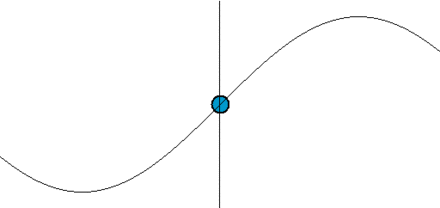

# <h1 style="color:purple"> Objetivo

O projeto WPT (WIRELESS POWER TRANSFER WIRELESS POWER TRANSFER ) consiste em um mecanismo de transmissão de energia sem fio por intermédio do eletromagnetismo e ondulatória.


In [1]:
#Importando Bibliotecas 
from cmath import *
from numpy import linalg
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#Definição de Dados Iniciais 
C1=0.1e-6
C2=0.1e-6
L1=196e-6
L2=196e-6
R1=0.5
R2=0.5
K=1
f=60 #frequencia
w=2*pi*f#calculando a frequencia angular 

## <li style="color:purple"> Etapa 1
### Atividade 1

[ inserir foto do do diagrama do modelo WPT  ]

[inserir demonstração de calculo da frequencia de ressonancia do conjunto LC]

Wressonancia = sqrt(LC)


In [7]:
#função de ressonância 
def Reso(L1, L2, C1, C2): 
    Reso1=1/(2*pi*sqrt(L1*C1))
    Reso2=1/(2*pi*sqrt(L2*C2))
    return Reso1, Reso2

print("A frequência de ressonância é {:.0f} Hz!".format(abs(Reso(L1,L2,C1,C2)[0])))

A frequência de ressonância é 35949 Hz!


### Atividade 2

Criando Funções de Operação 

In [8]:
#função de Indutância mútua 
def M(k,L1, L2): 
    return k*sqrt(L1*L2)



In [9]:
XC1=1/(1j*w*C1) #Capacitância 1
XC2=1/(1j*w*C2) #Capacitância 2 
XL1=1j*w*L1 #Indutância 1
XL2=1J*w*L2 #Indutância 2 
XM=1j*w*M(K,L1,L2)# Indutância Mútua


print(M(K,L1,L2))


(0.000196+0j)


### Atividade 3

In [10]:
#Função para as correntes no transformador agora com o capacitor em série no primário e em paralelo no secundário
def CalcularTransformador(Uf, Rc,R1,R2, XC1, XC2, XL1, XL2, XM):
    Z=np.array([[R1+XL1+XC1, -XM],[XM, -XL2-R2-(1/(1/XC2+1/Rc))]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

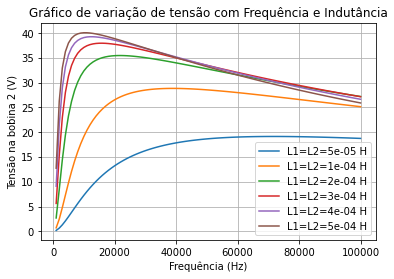

In [17]:


K_2=0.1
Rc_2=400 #valor de resistência do componente que se quer alimentar 

list_indutancias=[50e-6, 100e-6, 200e-6, 300e-6, 400e-6, 500e-6]
lista_frequencias=np.linspace(1e3, 100e3, 100)

for L in list_indutancias: 
    L1_2=L #Indutor no primário 
    L2_2=L #Indutor no secundário 
    lista_Ufs=[]
    for freq in lista_frequencias: 
        w_2=2*pi*freq #frequencia angular variável 
        #recalculando com base em cada valor da lista de frequências 
        C1_2=1/(L1_2*w_2**2) #Capacitor no primário 
        C2_2=1/(L2_2*w_2**2) #Capacitor no secundário
        R1_2=0.5+0.5*5*freq/100e3 #Resistor no primário 
        R2_2=0.5+0.5*5*freq/100e3 #Resistor no secundário
        XC1_2=1/(1j*w_2*C1_2) #Capacitância 1
        XC2_2=1/(1j*w_2*C2_2)#Capacitância 2
        XL1_2=1j*w_2*L1_2 #Indutância 1
        XL2_2=1J*w_2*L2_2 #Indutãncia 2
        XM_2=1j*w_2*M(K_2,L1_2,L2_2) #Indutância Mútua
        i1,i2=CalcularTransformador(5, Rc_2,R1_2,R2_2, XC1_2, XC2_2, XL1_2, XL2_2, XM_2) #correntes no primário e no secundário 
        Resistencia_equivalente=1/(1/Rc_2+1/XC2_2) 
        Vsaida=Resistencia_equivalente*i2  #tensão de saída no secundário 
        lista_Ufs.append(abs(Vsaida)) #lista com os valores de tensão no secundário 
    plt.plot(lista_frequencias,lista_Ufs, label="L1=L2=%.0e H" %L)
plt.xlabel("Frequência (Hz)")
plt.ylabel("Tensão na bobina 2 (V)")
plt.title("Gráfico de variação de tensão com Frequência e Indutância")
plt.legend()
plt.grid()
plt.show()

        
        